# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

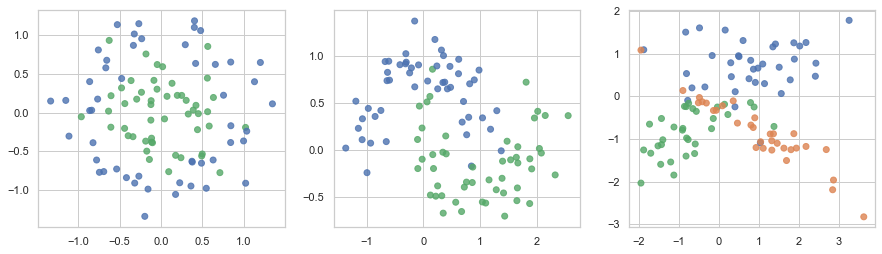

In [268]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [269]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision tree visualisation')

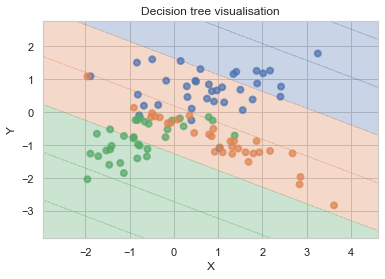

In [270]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

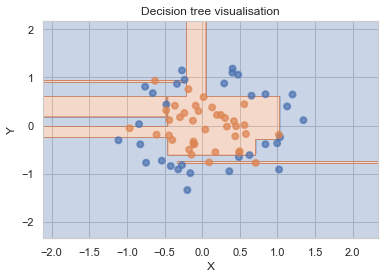

Train accuracy = 1.0000
Test accuracy = 0.8000


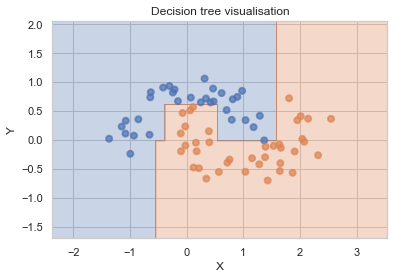

Train accuracy = 1.0000
Test accuracy = 0.9000


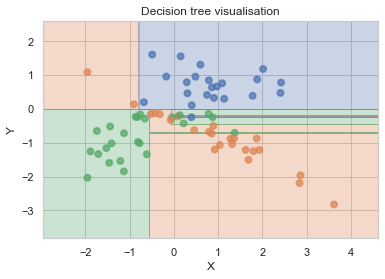

Train accuracy = 1.0000
Test accuracy = 0.7333


In [271]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)
    clf = DecisionTreeClassifier(random_state=42)
    model = clf.fit(X_train, y_train)
    plot_surface(model, X_train, y_train)
    plt.show()
    print("Train accuracy = %.4f" % accuracy_score(y_train, model.predict(X_train)))
    print("Test accuracy = %.4f" % accuracy_score(y_test, model.predict(X_test)))

__Ответ:__ Деревья переобучены, так как значение accuracy на обучающей выборке равно 1.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

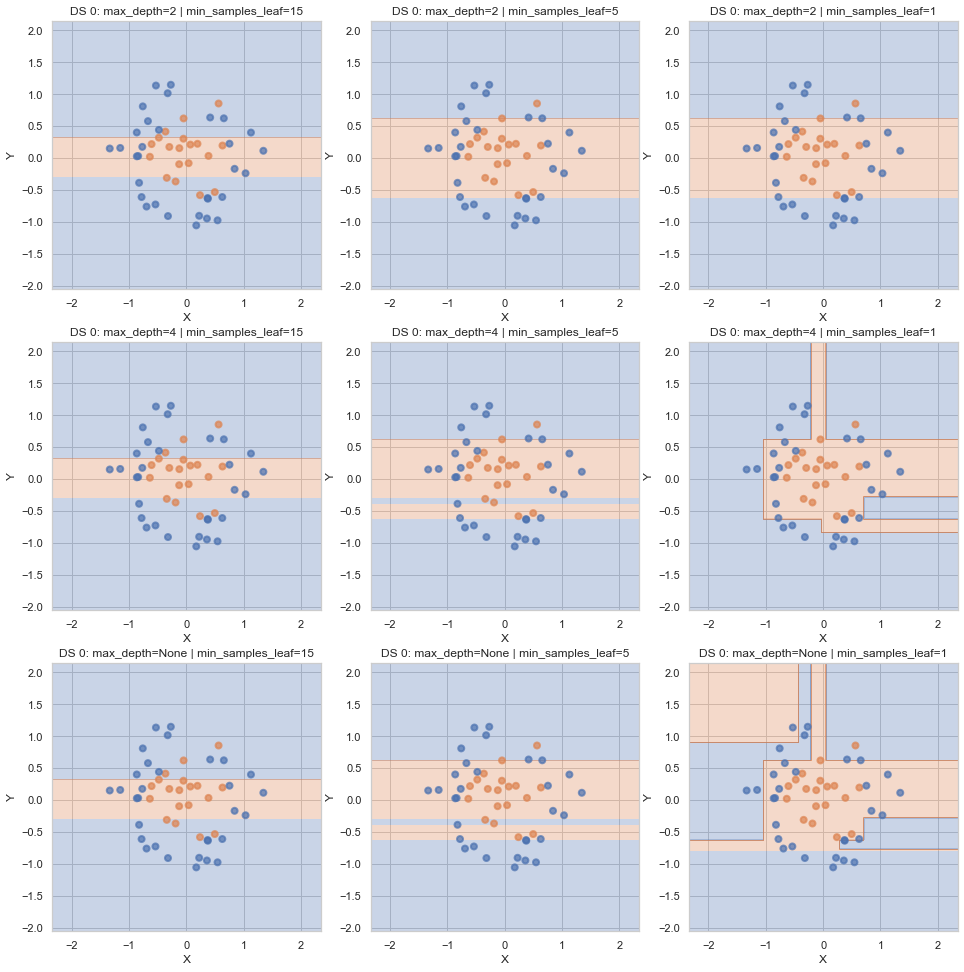

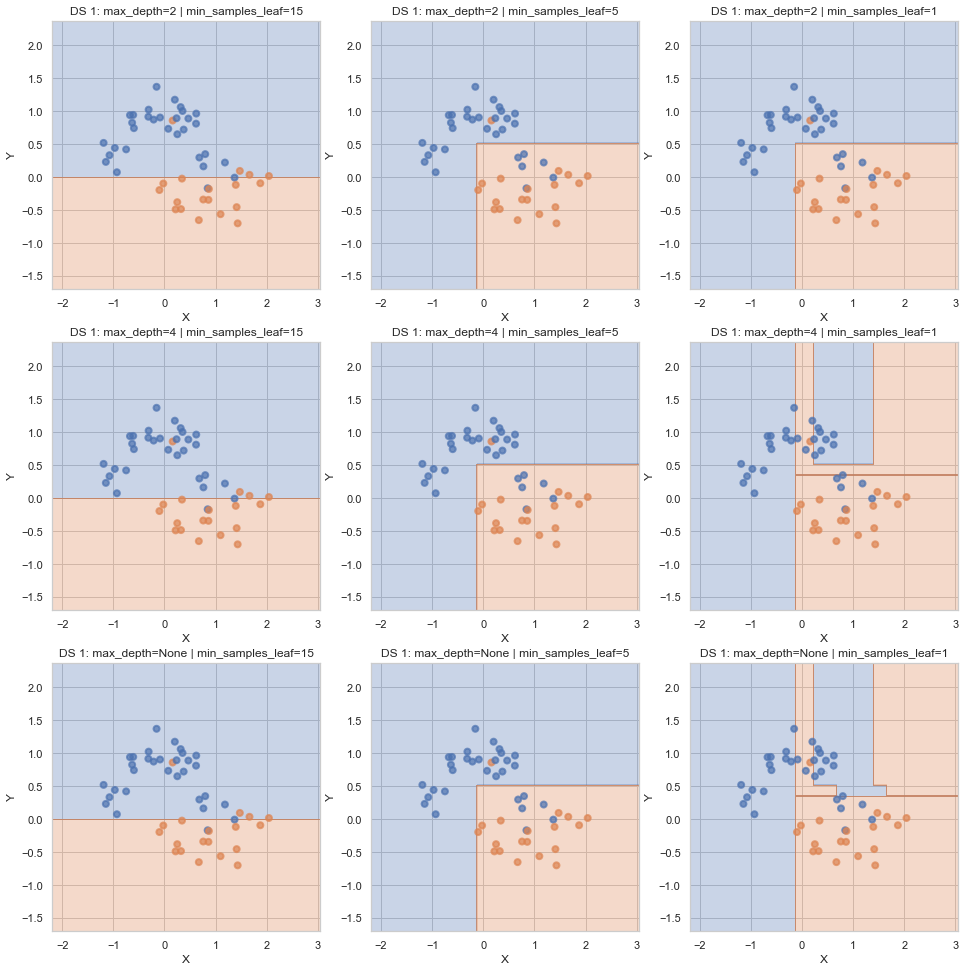

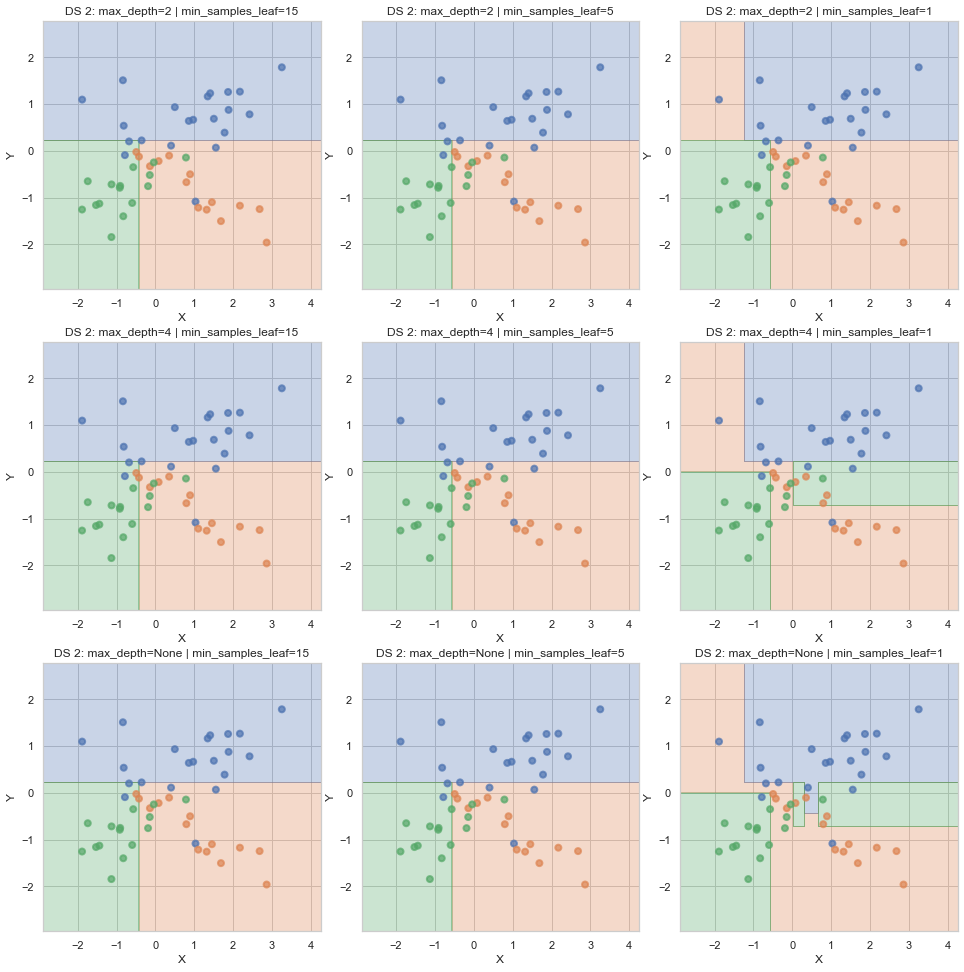

In [449]:
k = 0
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
    plt.figure(figsize=(14, 14))
    for i, max_depth in enumerate([2, 4, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            model = clf.fit(X_train, y_train)
            plt.subplot2grid((3, 3), (i, j))
            plot_surface(model, X_test, y_test)
            plt.title('DS ' + str(k) + ': max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
    k += 1
plt.show()

__Ответ:__ Как было показано на семинаре *Увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе приводит к увеличению качества на обучающей выборке и переобучению*. Разделяющая поверхность с каждым последующим графиком (кроме последнего) для каждого датасета все больше подстраивается под выборку. Видно, что самые переобученные результаты на значении min_samples_leaf=1. Если в листьях содержится по одному объекту, то модель становится переобученной. Если глубина дерева слишком большая, мы будем разбивать данные по менее важным признакам и строить из них правила, которые фактически не отражаются на результатах (создавать необъективные зависимости). Разбирая отдельно каждый датасет, хуже всего модель предсказывает результаты в том случае, где ответы одного класса находятся внутри другого (make_circles). Самый удачный результат получен на датасете make_moons. В make_classification результаты так же хороши до определенного момента.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [273]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


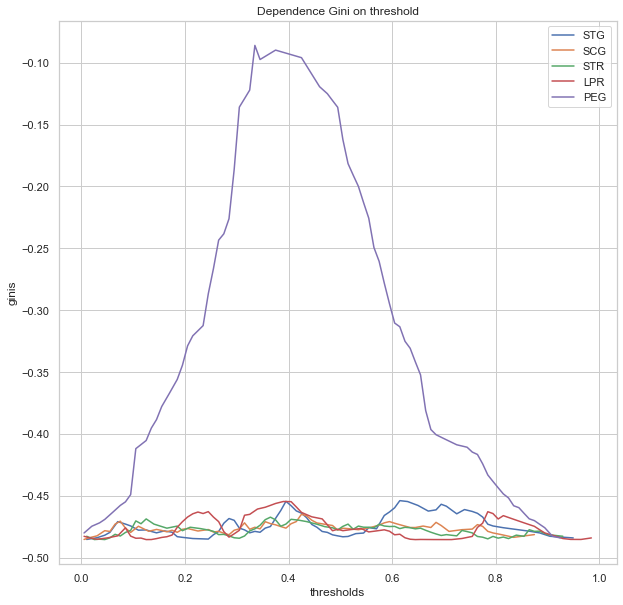

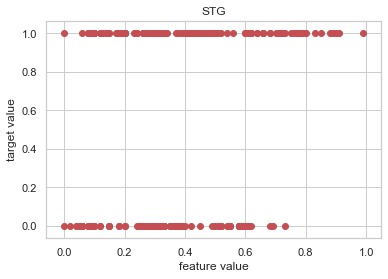

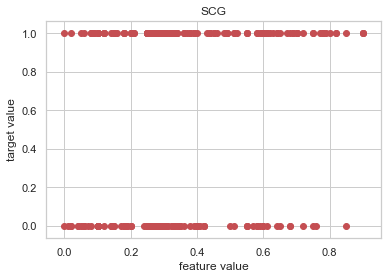

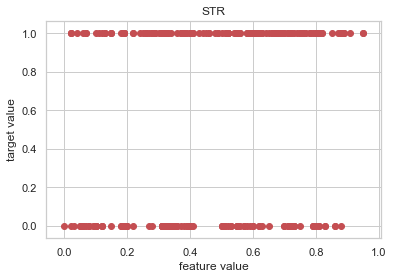

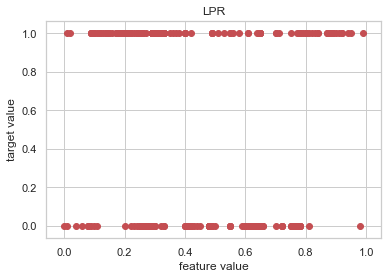

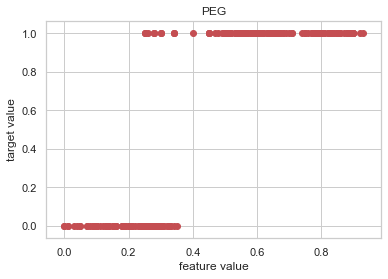

In [451]:
%autoreload 2

from hw5code import find_best_split

df = pd.read_csv('students.csv')
y = df[" UNS"]
X = df.drop(columns=[" UNS"])

plt.figure(figsize=(10, 10))
for feat in X.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(X[feat], y)
    plt.plot(thresholds, ginis, label=feat)
plt.xlabel('thresholds')
plt.ylabel('ginis')
plt.title('Dependence Gini on threshold')
plt.legend()
plt.show()

for feat in X.columns:
    plt.scatter(X[feat], y, c='r')
    plt.xlabel('feature value')
    plt.ylabel('target value')
    plt.title(feat)
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

 __Ответ:__ Признак *PEG* подходит для деления выборки на два поддерева. Это видно как по кривой, так и по графику scatter. Можно выбрать признак около 3,8 и разделить выборку так, что с очень высокой вероятностью в одно поддерево попадет один класс, а в другое другой. Судя по визуализации кривой хорошие признаки имеют ярко выраженную вершину, то есть критерий информативности должен быть минимален и значение индекса Джини близко к 0. Иначе, если значение критерия Джини стремится к -0.5 и не имеет критических точек, значит таргет там распределен примерно равномерно, и будет трудно разделить значения признака так, чтобы в одну часть попало заметно больше ответов одного класса.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [438]:
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

df = pd.read_csv('agaricus-lepiota.csv', header=None, names=['classes', 'cap-shape', 'cap-surface', 'cap-color', \
                                                               'bruises', 'odor', 'gill-attachment', 'gill-spacing', \
                                                               'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', \
                                                               'stalk-surface-above-ring', 'stalk-surface-below-ring', \
                                                               'stalk-color-above-ring', 'stalk-color-below-ring', \
                                                               'veil-type', 'veil-color', 'ring-number', 'ring-type', \
                                                               'spore-print-color', 'population', 'habitat'])
le = LabelEncoder()
for feat in df.columns:
    df[feat] = le.fit_transform(df[feat])
    
y = df["classes"]
X = df.drop(columns=["classes"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

clf = DecisionTree(['categorical'] * X_train.shape[1])
model = clf.fit(X_train.values, y_train.values)

print("Аccuracy = %.4f" % accuracy_score(y_test.values, model.predict(X_test.values)))


Аccuracy = 1.0000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [506]:
df_ttt = pd.read_csv('tic-tac-toe.csv', header=None, names=['tls', 'tms', 'trs', 'mls', 'mms', 'mrs', 'bls', 'bms', 'brs',\
                                                            'class'])
for feat in df_ttt.columns:
    df_ttt[feat] = le.fit_transform(df_ttt[feat])
y = df_ttt["class"]
X = df_ttt.drop(columns=["class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)
acc_depth = []
depth = []

plt.figure(figsize=(6, 6))
for i, max_depth in enumerate([2, 8, None]):
    clf = DecisionTree(['categorical'] * X_train.shape[1], max_depth=max_depth)
    model = clf.fit(X_train.values, y_train.values)
    acc_depth.append(accuracy_score(y_test.values, model.predict(X_test.values)))
    depth.append(max_depth)
plt.plot(acc_depth, depth, c='purple')
plt.xlabel('accuracy')
plt.ylabel('depth')
plt.title('Dependence accuracy on max_depth')
plt.show()

TypeError: unsupported operand type(s) for -=: 'NoneType' and 'float'

<Figure size 432x432 with 0 Axes>

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. 

Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [508]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


def algorithm(df, answer, X, y):
    clf = Pipeline([('DT', DecisionTree(['real'] * X.shape[1]))])
    answer.loc[df, 'DT real'] = np.mean(cross_val_score(clf, X.values, np.array(y, dtype=np.int16), cv=10, scoring = \
                                                        make_scorer(accuracy_score)))
    
    clf = Pipeline([('DT', DecisionTree(['categorical'] * X.shape[1]))])
    answer.loc[df, 'DT categorical'] = np.mean(cross_val_score(clf, X.values, np.array(y, dtype=np.int16), cv=10, scoring = \
                                                               make_scorer(accuracy_score))) 
                                           
    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False), X.columns)])
    
    clf = Pipeline([('DT', DecisionTree(['real'] * column_transformer.fit_transform(X).shape[1]))])
    answer.loc[df, 'DT ohe'] = np.mean(cross_val_score(clf, column_transformer.fit_transform(X), np.array(y, dtype=np.int16), \
                                                       cv=10, scoring = make_scorer(accuracy_score)))                                               
    
    clf = DecisionTreeClassifier(random_state=42)                                  
    answer.loc[df, 'DTC sklearn'] = np.mean(cross_val_score(clf, X.values, np.array(y, dtype=np.int16), cv=10, scoring = \
                                                            make_scorer(accuracy_score)))                                          
    


index = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
columns = ['DT real', 'DT categorical', 'DT ohe', 'DTC sklearn']
answer = pd.DataFrame(columns = columns, index = index)

df_mushrooms = pd.read_csv('agaricus-lepiota.csv', header=None, names=['classes', 'cap-shape', 'cap-surface', 'cap-color', \
                                                               'bruises', 'odor', 'gill-attachment', 'gill-spacing', \
                                                               'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', \
                                                               'stalk-surface-above-ring', 'stalk-surface-below-ring', \
                                                               'stalk-color-above-ring', 'stalk-color-below-ring', \
                                                               'veil-type', 'veil-color', 'ring-number', 'ring-type', \
                                                               'spore-print-color', 'population', 'habitat'])
for feat in df_mushrooms.columns:
    df_mushrooms[feat] = le.fit_transform(df_mushrooms[feat])
y = df_mushrooms["classes"]
X = df_mushrooms.drop(columns=["classes"])
algorithm('mushrooms', answer, X, y)

df_ttt = pd.read_csv('tic-tac-toe.csv', header=None, names=['tls', 'tms', 'trs', 'mls', 'mms', 'mrs', 'bls', 'bms', 'brs',\
                                                            'class'])
for feat in df_ttt.columns:
    df_ttt[feat] = le.fit_transform(df_ttt[feat])
y = df_ttt["class"]
X = df_ttt.drop(columns=["class"])
algorithm('tic-tac-toe', answer, X, y)

df_cars = pd.read_csv('car.csv', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
y = df_cars["class"]
y[(y == 'unacc') | (y == 'acc')] = 0
y[(y == 'good') | (y == 'vgood')] = 1
X = df_cars.drop(columns=["class"])
for feat in X.columns:
    X[feat] = le.fit_transform(X[feat])
algorithm('cars', answer, X, y)

df_nursery = pd.read_csv('nursery.csv', header=None, names=['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', \
                                                            'social', 'health', 'class'])
y = df_nursery["class"]
y
y[(y == 'not_recom') | (y == 'recommend')] = 0
y[(y == 'very_recom') | (y == 'priority') | (y == 'spec_prior')] = 1
X = df_nursery.drop(columns=["class"])
for feat in X.columns:
    X[feat] = le.fit_transform(X[feat])
algorithm('nursery', answer, X, y)

answer

,DT real,DT categorical,DT ohe,DTC sklearn
mushrooms,0.999261,1,0.999631,0.960384
tic-tac-toe,0.467533,0.541458,0.543575,0.771678
cars,0.942647,0.967546,0.919495,0.942707
nursery,0.999691,0.999846,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

__Ответ:__ Проанализируем каждый датасет отдельно.
- В *nursery* результат совпадает с точностью до десятитысячных, поэтому на нем смотреть на очень интересно. Ниже показано, что значения признаков существуют практически в равных количествах, а из просмотра полного датасета видно, что он блочно отсортирован. 
- Датасет *mushrooms* также иллюстрирует хорошие результаты, близкие к 1. Лучшее качество показал алгоритм, в котором мы интерпретировали переменные как категориальные. При обработке таких признаков в коде использовался алгоритм с лекции, где было сказано, что при наличии q значений признака подобный подход приводит к такому же результату как перебор $2^{q-1}-1$ вариантов.
- Идентичный результат можно наблюдать и в датасете *cars*. Там так же лучшее качество достигнуто при именовании признаков категориальными, ведь они такими и являются. Данные тоже оказываются частично отсортированными. В сравнении с датасетом грибов результат может быть немного хуже, так как видим, что распределение таргета далеко не равномерное. К одному классу принадлежит бОльшая часть всех объектов.
- Самым неудачным датасетом оказался tic-tac-toe. Взглянув на исходную таблицу, можно заметить, что там строки отсортированы по значению таргета, из-за чего разбиение происходит нехорошо. В качестве улучшений можно предложить шафлить строки перед передаче в cross_val_score, пересмотреть параметр разделения cv. Ниже я выполнила эти действия, и результаты действительно стали гораздо лучше. Стоит заметить, что параметр cv не так сильно повлиял (при изменении исходного 10 на 5 и на 15 качество улучшалось примерно одинаково). 

In [455]:
df_nursery.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,2
top,great_pret,improper,incomplete,3,less_conv,convenient,problematic,priority,1
freq,4320,2592,3240,3240,4320,6480,4320,4320,8638


In [458]:
df_cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,low,low,2,2,small,low,0
freq,432,432,432,576,576,576,1594


In [466]:
def algorithm(df, answer, X, y):
    clf = Pipeline([('DT', DecisionTree(['real'] * X.shape[1]))])
    answer.loc[df, 'DT real'] = np.mean(cross_val_score(clf, X.values, np.array(y, dtype=np.int16), cv=15, scoring = \
                                                        make_scorer(accuracy_score)))
    
    clf = Pipeline([('DT', DecisionTree(['categorical'] * X.shape[1]))])
    answer.loc[df, 'DT categorical'] = np.mean(cross_val_score(clf, X.values, np.array(y, dtype=np.int16), cv=15, scoring = \
                                                               make_scorer(accuracy_score))) 
                                           
    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False), X.columns)])
    
    clf = Pipeline([('DT', DecisionTree(['real'] * column_transformer.fit_transform(X).shape[1]))])
    answer.loc[df, 'DT ohe'] = np.mean(cross_val_score(clf, column_transformer.fit_transform(X), np.array(y, dtype=np.int16), \
                                                       cv=15, scoring = make_scorer(accuracy_score)))                                               
    
    clf = DecisionTreeClassifier(random_state=42)                                  
    answer.loc[df, 'DTC sklearn'] = np.mean(cross_val_score(clf, X.values, np.array(y, dtype=np.int16), cv=15, scoring = \
                                                            make_scorer(accuracy_score)))    


df_ttt = pd.read_csv('tic-tac-toe.csv', header=None, names=['tls', 'tms', 'trs', 'mls', 'mms', 'mrs', 'bls', 'bms', 'brs',\
                                                        'class'])
df_ttt = df_ttt.sample(frac=1)
for feat in df_ttt.columns:
    df_ttt[feat] = le.fit_transform(df_ttt[feat])
y = df_ttt["class"]
X = df_ttt.drop(columns=["class"])
algorithm('tic-tac-toe', answer, X, y)
answer.loc['tic-tac-toe', :]

DT real           0.866369
DT categorical    0.940476
DT ohe             0.94046
DTC sklearn       0.864302
Name: tic-tac-toe, dtype: object

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Джинни всегда была моим не самым любимым персонажем